In [22]:
#Import dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import requests
import time
from citipy import citipy
from datetime import datetime
from scipy.stats import linregress

from config import weather_api_key

In [2]:
HTTP_STATUS_OK  = 200
HTTP_STATUS_NOT_FOUND = 404

In [3]:
#Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low = -90.000, high = 90.000, size = 1500)
lngs = np.random.uniform(low = -90.000, high = 90.000, size = 1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [4]:
#Create a list for holding the cities.
cities = []

#Identify the nearest city for each latitude and longitude combination.
for coordinate in lat_lngs:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    #If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
    
#Print the city count to confirm sufficient count.
len(cities)

618

In [5]:
#Set initial url.
weather_url = f"https://api.openweathermap.org/data/2.5/weather?units=Metric&APPID={weather_api_key}"

In [7]:
#Create an empty list to hold the weather data.
city_data = []

#Print the beginning of the logging.
print("Beginning Data Retrieval        ")
print("--------------------------------")

#Create counters.
record_count = 1
set_count = 1

#Loop through all the cities in our list.
for i, city in enumerate(cities):  # TO DO: Add slicing for running purposes.
    
    #Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)
    
    #Create endpoint url with each city.
    city_url = weather_url + "&q=" + city.replace(" ","+")
    
    #Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    
    #Add 1 to the record count.
    record_count += 1

#Run an API request for each of the cities.
    try:
        #Parse the JSON and retrieve the data
        city_weather = requests.get(city_url).json()
        
        #Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        
        #Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        
        #Append the city information to the city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})
        
    #If an error is experienced, skip the city.
    except KeyError:
        print("City not found. Skipping...")
        pass
    
#Indicate that Data Loading is complete.
print("-------------------------------")
print("Data Retrieval Complete        ")
print("-------------------------------")

Beginning Data Retrieval        
--------------------------------
Processing Record 1 of Set 1 | cayenne
Processing Record 2 of Set 1 | ushuaia
Processing Record 3 of Set 1 | chulym
Processing Record 4 of Set 1 | umm lajj
Processing Record 5 of Set 1 | cidreira
Processing Record 6 of Set 1 | victoria
Processing Record 7 of Set 1 | pangoa
Processing Record 8 of Set 1 | amarante do maranhao
Processing Record 9 of Set 1 | veraval
Processing Record 10 of Set 1 | port elizabeth
Processing Record 11 of Set 1 | busselton
Processing Record 12 of Set 1 | ponta do sol
Processing Record 13 of Set 1 | hashtrud
Processing Record 14 of Set 1 | comodoro rivadavia
Processing Record 15 of Set 1 | beinamar
Processing Record 16 of Set 1 | quelimane
Processing Record 17 of Set 1 | kruisfontein
Processing Record 18 of Set 1 | adrar
Processing Record 19 of Set 1 | los llanos de aridane
Processing Record 20 of Set 1 | barentsburg
City not found. Skipping...
Processing Record 21 of Set 1 | ankara
Processing R

Processing Record 39 of Set 4 | walvis bay
Processing Record 40 of Set 4 | ibb
Processing Record 41 of Set 4 | ballinrobe
Processing Record 42 of Set 4 | santander
Processing Record 43 of Set 4 | blind river
Processing Record 44 of Set 4 | ostrovnoy
Processing Record 45 of Set 4 | yarega
Processing Record 46 of Set 4 | coquimbo
Processing Record 47 of Set 4 | saldanha
Processing Record 48 of Set 4 | sao joao da barra
Processing Record 49 of Set 4 | kazincbarcika
Processing Record 50 of Set 4 | kajaani
Processing Record 1 of Set 5 | talnakh
Processing Record 2 of Set 5 | irtyshskiy
Processing Record 3 of Set 5 | srivardhan
Processing Record 4 of Set 5 | marienburg
Processing Record 5 of Set 5 | solovetskiy
City not found. Skipping...
Processing Record 6 of Set 5 | kyshtovka
Processing Record 7 of Set 5 | naryan-mar
Processing Record 8 of Set 5 | bordighera
Processing Record 9 of Set 5 | bako
Processing Record 10 of Set 5 | bud
Processing Record 11 of Set 5 | youghal
Processing Record 12

Processing Record 29 of Set 8 | tiznit
Processing Record 30 of Set 8 | talesh
City not found. Skipping...
Processing Record 31 of Set 8 | zemio
Processing Record 32 of Set 8 | shibarghan
City not found. Skipping...
Processing Record 33 of Set 8 | arica
Processing Record 34 of Set 8 | liverpool
Processing Record 35 of Set 8 | leova
Processing Record 36 of Set 8 | inirida
Processing Record 37 of Set 8 | rio cuarto
Processing Record 38 of Set 8 | henties bay
Processing Record 39 of Set 8 | goma
Processing Record 40 of Set 8 | gazanjyk
Processing Record 41 of Set 8 | sirfa
City not found. Skipping...
Processing Record 42 of Set 8 | notse
Processing Record 43 of Set 8 | karakol
Processing Record 44 of Set 8 | mataundh
Processing Record 45 of Set 8 | inongo
Processing Record 46 of Set 8 | marzuq
Processing Record 47 of Set 8 | bhakkar
Processing Record 48 of Set 8 | mabaruma
Processing Record 49 of Set 8 | tabas
Processing Record 50 of Set 8 | ugoofaaru
Processing Record 1 of Set 9 | sault s

Processing Record 15 of Set 12 | kisangani
Processing Record 16 of Set 12 | pohrebyshche
Processing Record 17 of Set 12 | dustlik
Processing Record 18 of Set 12 | matiri
Processing Record 19 of Set 12 | hare bay
Processing Record 20 of Set 12 | grindavik
Processing Record 21 of Set 12 | padilla
Processing Record 22 of Set 12 | waddan
Processing Record 23 of Set 12 | morondava
Processing Record 24 of Set 12 | lewisporte
Processing Record 25 of Set 12 | isiro
Processing Record 26 of Set 12 | carballo
Processing Record 27 of Set 12 | emba
Processing Record 28 of Set 12 | exu
Processing Record 29 of Set 12 | seydi
Processing Record 30 of Set 12 | backi petrovac
Processing Record 31 of Set 12 | rovaniemi
Processing Record 32 of Set 12 | cornwall
Processing Record 33 of Set 12 | solsvik
City not found. Skipping...
Processing Record 34 of Set 12 | zatoka
Processing Record 35 of Set 12 | wampusirpi
City not found. Skipping...
Processing Record 36 of Set 12 | sinfra
Processing Record 37 of Set 

In [8]:
len(city_data)

574

In [10]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Cayenne,4.9333,-52.3333,26.02,89,100,0.00,GF,2022-10-29 20:59:43
1,Ushuaia,-54.8000,-68.3000,3.81,87,100,9.26,AR,2022-10-29 21:01:25
2,Chulym,55.0997,80.9572,-2.07,81,100,2.07,RU,2022-10-29 21:04:08
3,Umm Lajj,25.0213,37.2685,26.55,56,16,2.02,SA,2022-10-29 21:04:09
4,Cidreira,-30.1811,-50.2056,20.17,89,100,3.59,BR,2022-10-29 21:04:09
5,Victoria,22.2855,114.1577,24.10,66,100,2.68,HK,2022-10-29 21:04:10
6,Pangoa,-12.1167,-73.0000,25.04,91,56,1.71,PE,2022-10-29 21:04:11
7,Amarante Do Maranhao,-5.5667,-46.7422,31.71,38,100,1.99,BR,2022-10-29 21:04:11
8,Veraval,20.9000,70.3667,25.78,54,0,2.98,IN,2022-10-29 21:01:39
9,Port Elizabeth,-33.9180,25.5701,20.17,66,40,10.80,ZA,2022-10-29 21:01:39


In [11]:
new_column_order = ["City", "Country",
                    "Date", "Lat",
                    "Lng", "Max Temp",
                    "Humidity", "Cloudiness", "Wind Speed"]

city_data_df = city_data_df[new_column_order]

city_data_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Cayenne,GF,2022-10-29 20:59:43,4.9333,-52.3333,26.02,89,100,0.00
1,Ushuaia,AR,2022-10-29 21:01:25,-54.8000,-68.3000,3.81,87,100,9.26
2,Chulym,RU,2022-10-29 21:04:08,55.0997,80.9572,-2.07,81,100,2.07
3,Umm Lajj,SA,2022-10-29 21:04:09,25.0213,37.2685,26.55,56,16,2.02
4,Cidreira,BR,2022-10-29 21:04:09,-30.1811,-50.2056,20.17,89,100,3.59


In [12]:
# Create the output file (CSV).

output_data_file = "weather_data/cities.csv"

# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

### Get Data for Plotting

In [13]:
#Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

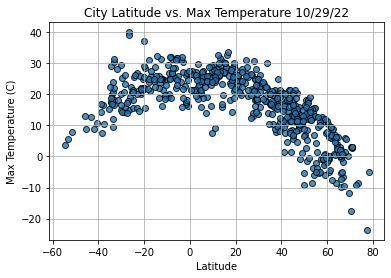

In [15]:
# Build the scatter plot for latitude vs max. temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black",
            linewidths=1,
            marker="o",
            alpha=0.8,
            label="Cities")

# Incorporate other graph properties.
plt.title(f"City Latitude vs. Max Temperature {time.strftime('%x')}")
plt.ylabel("Max Temperature (C)")
plt.xlabel("Latitude")
plt.grid(True)

#Save the figure.
plt.savefig("weather_data/Fig1.png")

#Show the plot.
plt.show()

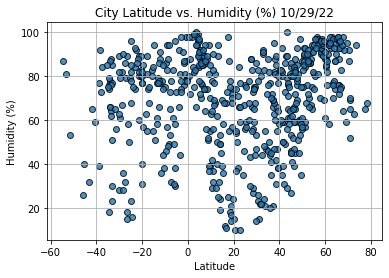

In [18]:
# Build the scatter plot for latitude vs humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black",
            linewidths=1,
            marker="o",
            alpha=0.8,
            label="Cities")

# Incorporate other graph properties.
plt.title(f"City Latitude vs. Humidity (%) {time.strftime('%x')}")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

#Save the figure.
plt.savefig("weather_data/Fig2.png")

#Show the plot.
plt.show()

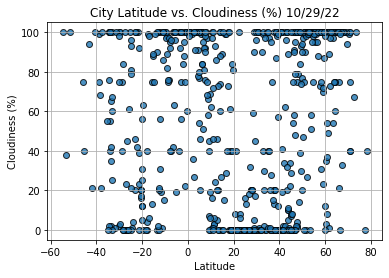

In [19]:
# Build the scatter plot for latitude vs cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black",
            linewidths=1,
            marker="o",
            alpha=0.8,
            label="Cities")

# Incorporate other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) {time.strftime('%x')}")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

#Save the figure.
plt.savefig("weather_data/Fig3.png")

#Show the plot.
plt.show()

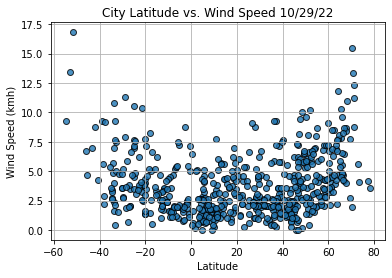

In [21]:
# Build the scatter plot for latitude vs wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black",
            linewidths=1,
            marker="o",
            alpha=0.8,
            label="Cities")

# Incorporate other graph properties.
plt.title(f"City Latitude vs. Wind Speed {time.strftime('%x')}")
plt.ylabel("Wind Speed (kmh)")
plt.xlabel("Latitude")
plt.grid(True)

#Save the figure.
plt.savefig("weather_data/Fig4.png")

#Show the plot.
plt.show()

### Linear regressions

In [23]:
index13 = city_data_df.loc[13]
index13

City           Comodoro Rivadavia
Country                        AR
Date          2022-10-29 21:04:15
Lat                      -45.8667
Lng                         -67.5
Max Temp                    12.92
Humidity                       26
Cloudiness                     75
Wind Speed                   6.69
Name: 13, dtype: object

In [24]:
city_data_df["Lat"] >= 0

0       True
1      False
2       True
3       True
4      False
       ...  
569     True
570     True
571     True
572     True
573    False
Name: Lat, Length: 574, dtype: bool

In [26]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

northern_hemi_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Cayenne,GF,2022-10-29 20:59:43,4.9333,-52.3333,26.02,89,100,0.00
2,Chulym,RU,2022-10-29 21:04:08,55.0997,80.9572,-2.07,81,100,2.07
3,Umm Lajj,SA,2022-10-29 21:04:09,25.0213,37.2685,26.55,56,16,2.02
5,Victoria,HK,2022-10-29 21:04:10,22.2855,114.1577,24.10,66,100,2.68
8,Veraval,IN,2022-10-29 21:01:39,20.9000,70.3667,25.78,54,0,2.98


In [27]:
southern_hemi_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
1,Ushuaia,AR,2022-10-29 21:01:25,-54.8000,-68.3000,3.81,87,100,9.26
4,Cidreira,BR,2022-10-29 21:04:09,-30.1811,-50.2056,20.17,89,100,3.59
6,Pangoa,PE,2022-10-29 21:04:11,-12.1167,-73.0000,25.04,91,56,1.71
7,Amarante Do Maranhao,BR,2022-10-29 21:04:11,-5.5667,-46.7422,31.71,38,100,1.99
9,Port Elizabeth,ZA,2022-10-29 21:01:39,-33.9180,25.5701,20.17,66,40,10.80


In [58]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

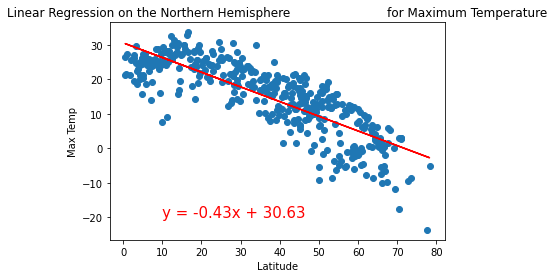

In [61]:
#Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,-20))

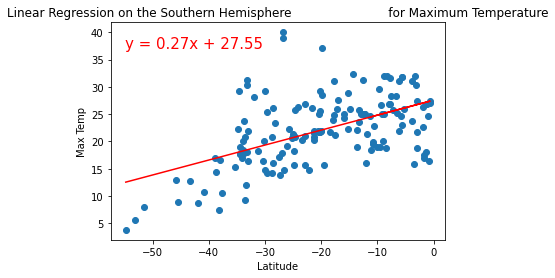

In [70]:
#Linear regression on the Southern Hemisphere. 
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-55, 37))

In [71]:
linear_regress_north = linregress(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"])
linear_regress_north

LinregressResult(slope=-0.42624325046478156, intercept=30.634340039905663, rvalue=-0.8228029200268736, pvalue=3.883003633749228e-104, stderr=0.014434879529004352, intercept_stderr=0.5989460728868052)

In [72]:
linear_regress_south = linregress(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"])
linear_regress_south

LinregressResult(slope=0.27364854100941455, intercept=27.552241950252487, rvalue=0.5352915690239487, pvalue=6.050692161974384e-13, stderr=0.03479590061766019, intercept_stderr=0.8232017795393732)

### Regression lines for humidity

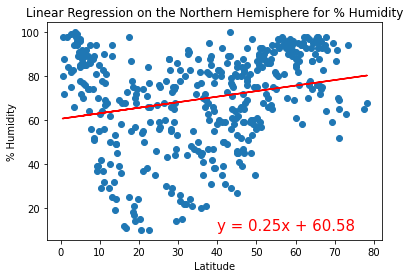

In [73]:
#Linear regression on the Northern Hemisphere.
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]

# Call the function.
plot_linear_regression(x_values, y_values,
                      'Linear Regression on the Northern Hemisphere for % Humidity',
                      '% Humidity', (40,10))

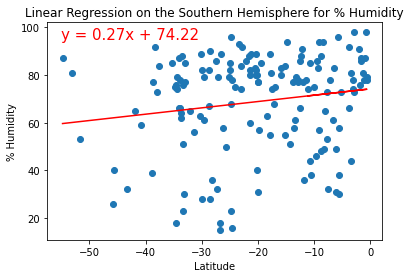

In [77]:
# Linear regression on the Southern Hemisphere. 
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]

# Call the function.
plot_linear_regression(x_values, y_values,
                      "Linear Regression on the Southern Hemisphere for % Humidity",
                      "% Humidity", (-55, 95))

In [78]:
linregress(northern_hemi_df["Lat"], northern_hemi_df["Humidity"])

LinregressResult(slope=0.25232569341525735, intercept=60.57620780728598, rvalue=0.23136759151819297, pvalue=1.742662542638075e-06, stderr=0.05201941812567248, intercept_stderr=2.1584403345815297)

In [79]:
linregress(southern_hemi_df["Lat"], southern_hemi_df["Humidity"])

LinregressResult(slope=0.2657259535231377, intercept=74.22363889984724, rvalue=0.16138023937152413, pvalue=0.044152529715889635, stderr=0.13094623631989555, intercept_stderr=3.097927423893472)

### Regression for latitudes vs. cloudiness

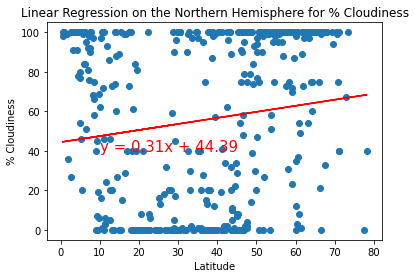

In [83]:
# Create the linear regression for the Northern Hemisphere.
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]

# Call the function.
plot_linear_regression(x_values, y_values,
                      "Linear Regression on the Northern Hemisphere for % Cloudiness",
                      "% Cloudiness", (10, 40))

In [84]:
linregress(x_values, y_values)

LinregressResult(slope=0.30676762647134326, intercept=44.39105407114688, rvalue=0.14561309980390336, pvalue=0.0028443986965736366, stderr=0.10219006834182173, intercept_stderr=4.24016979139902)

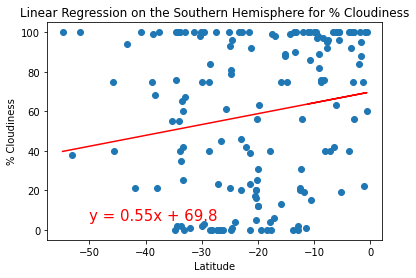

In [86]:
# Linear regression on the southern hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]

# Call the function.
plot_linear_regression(x_values, y_values,
                      "Linear Regression on the Southern Hemisphere for % Cloudiness",
                      "% Cloudiness", (-50, 5))

In [87]:
linregress(x_values, y_values)

LinregressResult(slope=0.5491215469664381, intercept=69.79674229180151, rvalue=0.1781115156351731, pvalue=0.02611220504838415, stderr=0.24446448429875314, intercept_stderr=5.783543317938156)

### Regression for latitude and wind speed

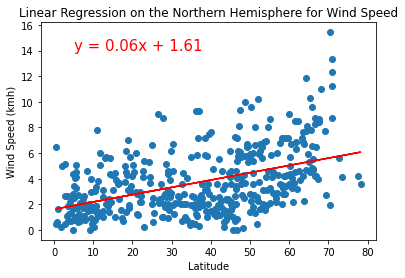

In [92]:
# Linear regression for the northern hemisphere.
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]

# Call the function
plot_linear_regression(x_values, y_values,
                      "Linear Regression on the Northern Hemisphere for Wind Speed",
                      "Wind Speed (kmh)", (5, 14))

In [93]:
linregress(x_values,y_values)

LinregressResult(slope=0.05700104108203907, intercept=1.6149523682541052, rvalue=0.4552845892666604, pvalue=8.839382145358154e-23, stderr=0.0054652743579319055, intercept_stderr=0.2267704837684956)

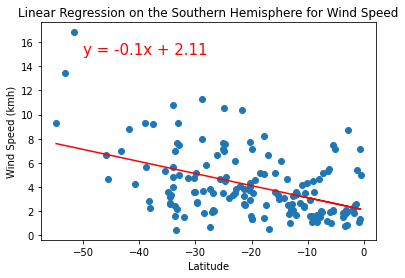

In [95]:
# Linear regression for the northern hemisphere.
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]

# Call the function
plot_linear_regression(x_values, y_values,
                      "Linear Regression on the Southern Hemisphere for Wind Speed",
                      "Wind Speed (kmh)", (-50, 15))

In [96]:
linregress(x_values, y_values)

LinregressResult(slope=-0.0999750954488898, intercept=2.114147486653523, rvalue=-0.45759050328264034, pvalue=1.906279273851448e-09, stderr=0.015654379997760204, intercept_stderr=0.3703514851747016)